In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import category_encoders as ce

from mpl_toolkits.mplot3d import *
from regressors import stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

In [40]:
df = pd.read_csv('car.csv')
df.columns=['buying','maint','doors','persons','lug_boot','safety','class']
df_02 = df.copy()
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [41]:
#df_02 = pd.get_dummies(df_02, columns=['buying','maint','lug_boot','safety'], drop_first= True, dtype='int64')

In [42]:
df_02 = df_02.dropna()
df_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [43]:
df_02['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [44]:
#df_02[['doors','persons']] = df_02[['doors','persons']].astype(float)


PROCESAMOS LOS DATOS


In [62]:
under_sample = RandomUnderSampler(random_state=42)

In [63]:

x = df_02.drop(['class'], axis=1)
y = df_02['class']
#x_over, y_over = under_sample.fit_resample(x,y)
#sns.countplot(y_over)
#plt.xticks(rotation =45)
#plt.show()

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [87]:
tree = DecisionTreeClassifier(max_depth = 3, random_state=42)

In [88]:
print("convertimos estas variables objets a numericas")
cols=['buying','maint','doors','persons','lug_boot','safety']
encoder = ce.OrdinalEncoder(cols=x.columns)
print(encoder)

convertimos estas variables objets a numericas
OrdinalEncoder(cols=Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object'))


In [89]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)
x_train.head() , x_test.head()

(      buying  maint  doors  persons  lug_boot  safety
 107        1      1      1        1         1       1
 900        2      2      2        2         1       2
 1708       3      3      3        1         2       3
 705        4      4      4        1         3       2
 678        4      4      2        1         3       2,
       buying  maint  doors  persons  lug_boot  safety
 599        1      1      1        1         1       1
 932        2      2      1        2         1       1
 628        1      1      2        1         1       2
 1497       3      1      2        2         2       3
 1262       2      3      1        3         2       1)

In [90]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [91]:
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)

ANALIZAMOS LAS METRICAS

In [92]:
#para ver  train vs pred
print(metrics.accuracy_score(y_train,y_train_pred_tree))
#para ver test  vs pred
print(metrics.accuracy_score(y_test, y_test_pred_tree ))

0.7921795800144823
0.7687861271676301


In [95]:
metrics.confusion_matrix(y_train,y_train_pred_tree)

array([[171,   0, 136,   0],
       [ 54,   0,   0,   0],
       [ 49,   0, 923,   0],
       [ 40,   0,   8,   0]])

In [94]:
metrics.confusion_matrix(y_test, y_test_pred_tree)

array([[ 36,   0,  41,   0],
       [ 15,   0,   0,   0],
       [  7,   0, 230,   0],
       [ 12,   0,   5,   0]])

las variables relevantes para el test son


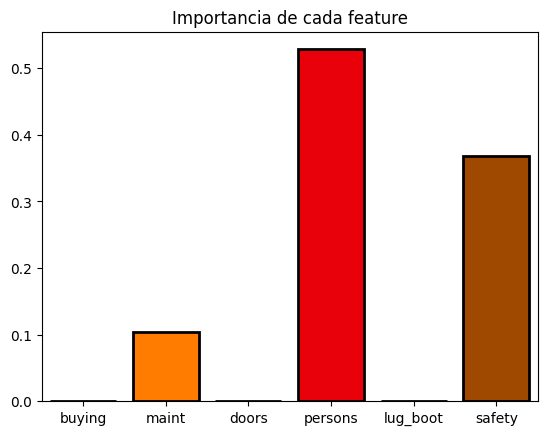

In [93]:
#veamos los importances
print("las variables relevantes para el test son")
importances = tree.feature_importances_
colums = x.columns
df_importances = pd.DataFrame([importances], columns=colums)
sns.barplot(df_importances, palette = 'bright', saturation= 2.0, edgecolor = 'black', linewidth= 2)
plt.title('Importancia de cada feature')
plt.show()

para random forest

In [133]:
ran_for = RandomForestClassifier(n_estimators=3, random_state=42)
ran_for.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [134]:
y_train_pred_ran_for = ran_for.predict(x_train)
y_test_pred_ran_for = ran_for.predict(x_test)

In [135]:
#para ver  train vs pred
print(metrics.accuracy_score(y_train,y_train_pred_ran_for))
#para ver test  vs pred
print(metrics.accuracy_score(y_test, y_test_pred_ran_for ))

0.9884141926140478
0.7803468208092486


In [136]:
metrics.confusion_matrix(y_test, y_test_pred_ran_for)

array([[ 40,   1,  27,   9],
       [  2,  10,   0,   3],
       [ 16,   0, 220,   1],
       [ 12,   3,   2,   0]])

In [137]:
metrics.confusion_matrix(y_train,y_train_pred_ran_for)

array([[301,   2,   3,   1],
       [  2,  51,   1,   0],
       [  6,   1, 965,   0],
       [  0,   0,   0,  48]])

las variables relevantes para el test son


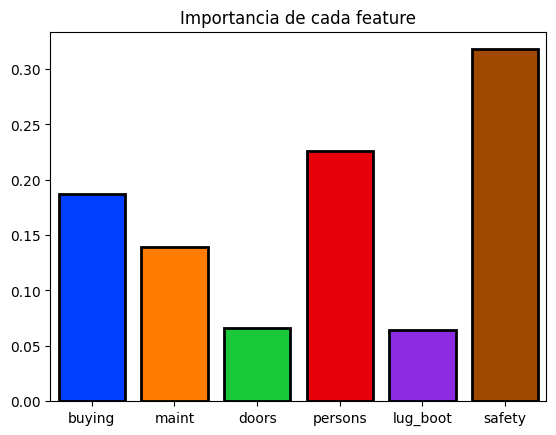

In [138]:
#veamos los importances
print("las variables relevantes para el test son")
importances_ran = ran_for.feature_importances_
colums = x.columns
df_importances_ran = pd.DataFrame([importances_ran], columns=colums)
sns.barplot(df_importances_ran, palette = 'bright', saturation= 2.0, edgecolor = 'black', linewidth= 2)
plt.title('Importancia de cada feature')
plt.show()

In [140]:
#RF
print(metrics.classification_report(y_test, y_test_pred_ran_for))

              precision    recall  f1-score   support

         acc       0.57      0.52      0.54        77
        good       0.71      0.67      0.69        15
       unacc       0.88      0.93      0.91       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.78       346
   macro avg       0.54      0.53      0.53       346
weighted avg       0.76      0.78      0.77       346

